# Student Performance Indicator

### Life cycle of Machine Learning Project
- Understanding the Problem Statement
- Data Collection
- Data checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

## 1) Problem Statement

- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethinicity, Parental level of education, Lunch and Test preparation course.

## 2) Data Collection

- Data Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- the data consists of 8 column and 1000 rows.

### 2.1 Import Data and Required Packages

##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warnings Library.

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas Dataframe

In [2]:
df = pd.read_csv('data/stud.csv')

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

### 2.2 Dataset Information
- gender: sex of students -> (Male/Female)
- race/ethnicity: ethnicity of students -> (Group A,B,C,D,E)
- parental level of education: parents final education -> (bachelor's degree, some collage, master's degree, associate's degree, hight school)
- lunch: having lunch before test (standard or free/reduced)
- test preparation course: complete or not complete before test
- math score
- reading score
- writing score

## 3) Data Checks to perform
- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check missing Values

In [5]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

Note: There are no missing values in the data set

### 3.2 Check Duplicates

In [6]:
df.duplicated().sum()

np.int64(0)

Note: There are no duplicates values in the data set

### 3.2 Check Data types

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4 Checking the number of unique values of esch column

In [8]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### 3.5 Check statistics of dataset

In [9]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Insight
- From above description of numerical data, all means are very close to each other - between 66 and 68.05;
- All standard desviations are also close - betweeen 14.6 and 15.19;
- While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading myet highter = 17

### 3.7 Exploring data

In [10]:
lst_cat = ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
              'test_preparation_course']
for col in lst_cat:
    print(f"Categories in '{col}' variable:     ",end = " ") 
    print(df[col].unique())


Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:      ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' variable:      ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test_preparation_course' variable:      ['none' 'completed']


In [11]:
# define nemerical and categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']

print(f'We have {len(numeric_features)} numerical features: {numeric_features}')
print(f'We have {len(categorical_features)} categorical features: {categorical_features}')

We have 3 numerical features: ['math_score', 'reading_score', 'writing_score']
We have 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


### 3.8 Adding columns for 'Total Score' and 'Averange'

In [12]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average_score'] = df['total_score'] / 3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [13]:
reading_full = df[df['reading_score'] == 100]['average_score'].count()
writing_full = df[df['writing_score'] == 100]['average_score'].count()
math_full = df[df['math_score'] == 100]['average_score'].count()

print(f"Number of students who got full marks in reading: {reading_full}")
print(f"Number of students who got full marks in writing: {writing_full}")
print(f"Number of students who got full marks in math: {math_full}")



Number of students who got full marks in reading: 17
Number of students who got full marks in writing: 14
Number of students who got full marks in math: 7


In [14]:
reading_less_20 = df[df['reading_score'] < 20]['average_score'].count()
writing_less_20 = df[df['writing_score'] < 20]['average_score'].count()
math_less_20 = df[df['math_score'] < 20]['average_score'].count()

print(f"Number of students who got less than 20 in reading: {reading_less_20}")
print(f"Number of students who got less than 20 in writing: {writing_less_20}")
print(f"Number of students who got less than 20 in math: {math_less_20}")

Number of students who got less than 20 in reading: 1
Number of students who got less than 20 in writing: 3
Number of students who got less than 20 in math: 4


Insights
- From above values we get students have performed the worst in Maths
- Best performance is in reading section

## 4) Exploring Data (Visualization)

### 4.1 Visualize averange score ditriution to make some conclusion
- Histogram
- Kernel Distribution Function (KDE)

#### 4.1.1 Histogram & KDE

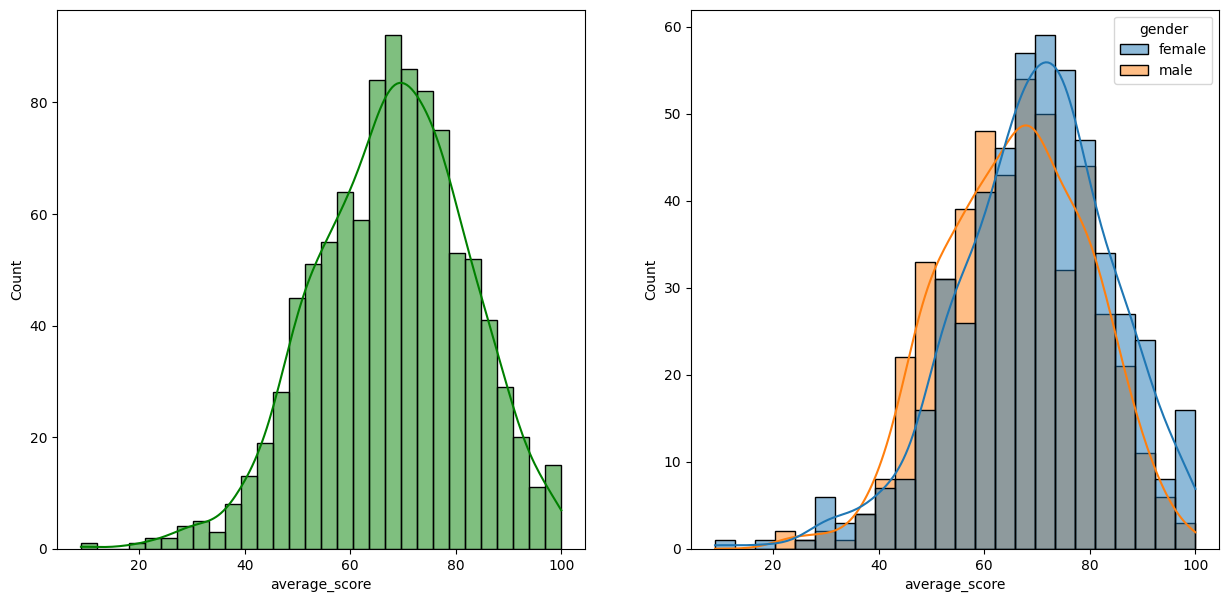

In [15]:
fig, axs = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='average_score', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='average_score', kde=True, hue='gender')
plt.show()

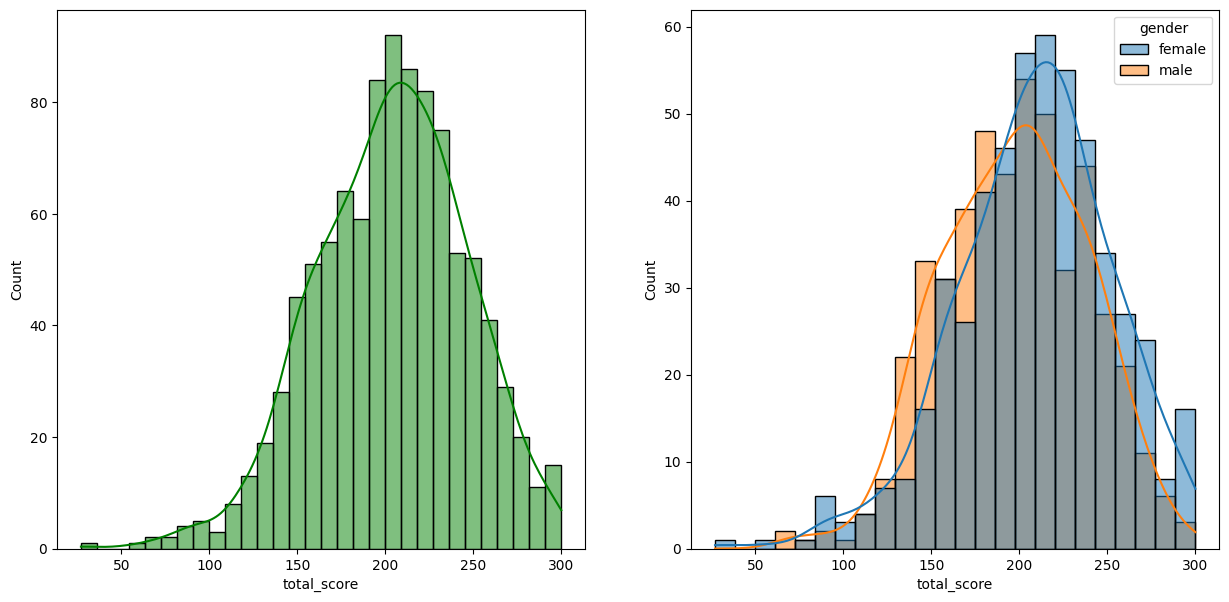

In [16]:
fig, axs = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='total_score', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='total_score', kde=True, hue='gender')
plt.show()

Insight 
- Female students tend to perform well them male students

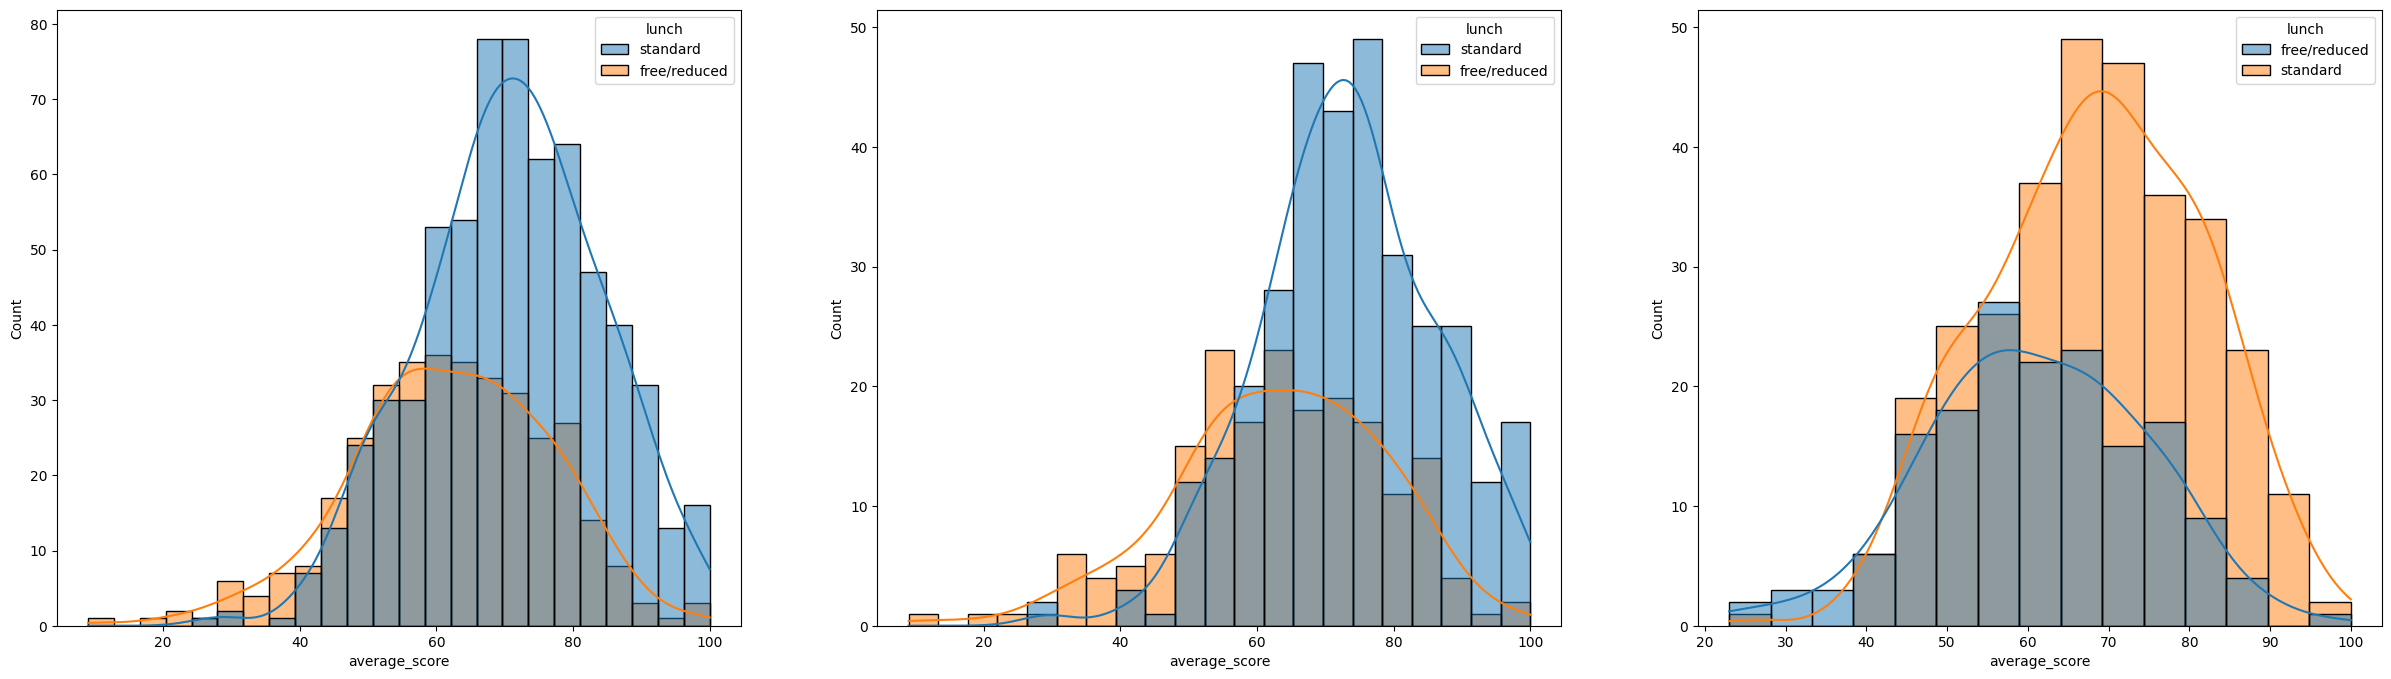

In [17]:
fig, axs = plt.subplots(1,3, figsize=(30,8))
# plt.subplots(1,3, figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df, x='average_score', kde=True, hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'], x='average_score', kde=True, hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'], x='average_score', kde=True, hue='lunch')
plt.show()

insight
- Standard lunch helps perform well in exams.
- Standard lunch helps perform well in exams be it a male or a female

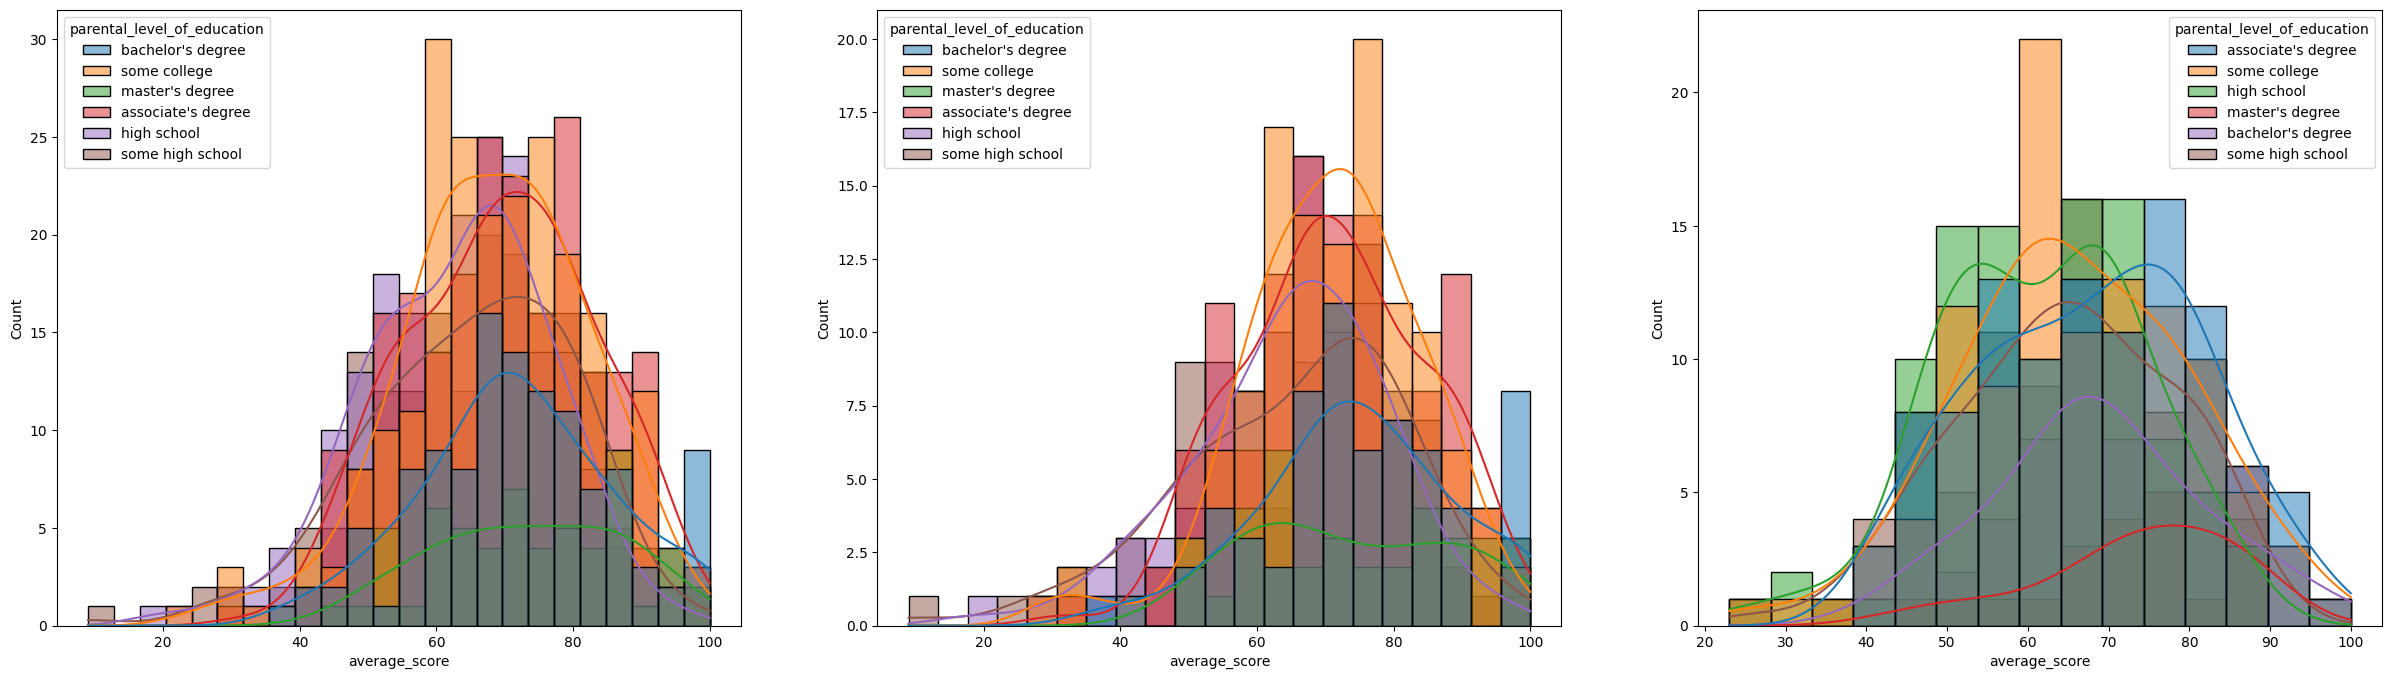

In [18]:
fig, axs = plt.subplots(1,3, figsize=(30,8))
# plt.subplots(1,3, figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df, x='average_score', kde=True, hue='parental_level_of_education')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'], x='average_score', kde=True, hue='parental_level_of_education')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'], x='average_score', kde=True, hue='parental_level_of_education')
plt.show()

Insights
- In general parent's education don't help student perform well in exam.
- 2nd plot shows thet parent's whose education is associate's degree or master's degree their male child tend to perform well in exam.
- 3rd plot we can see there is no effect of parent's education on female students.

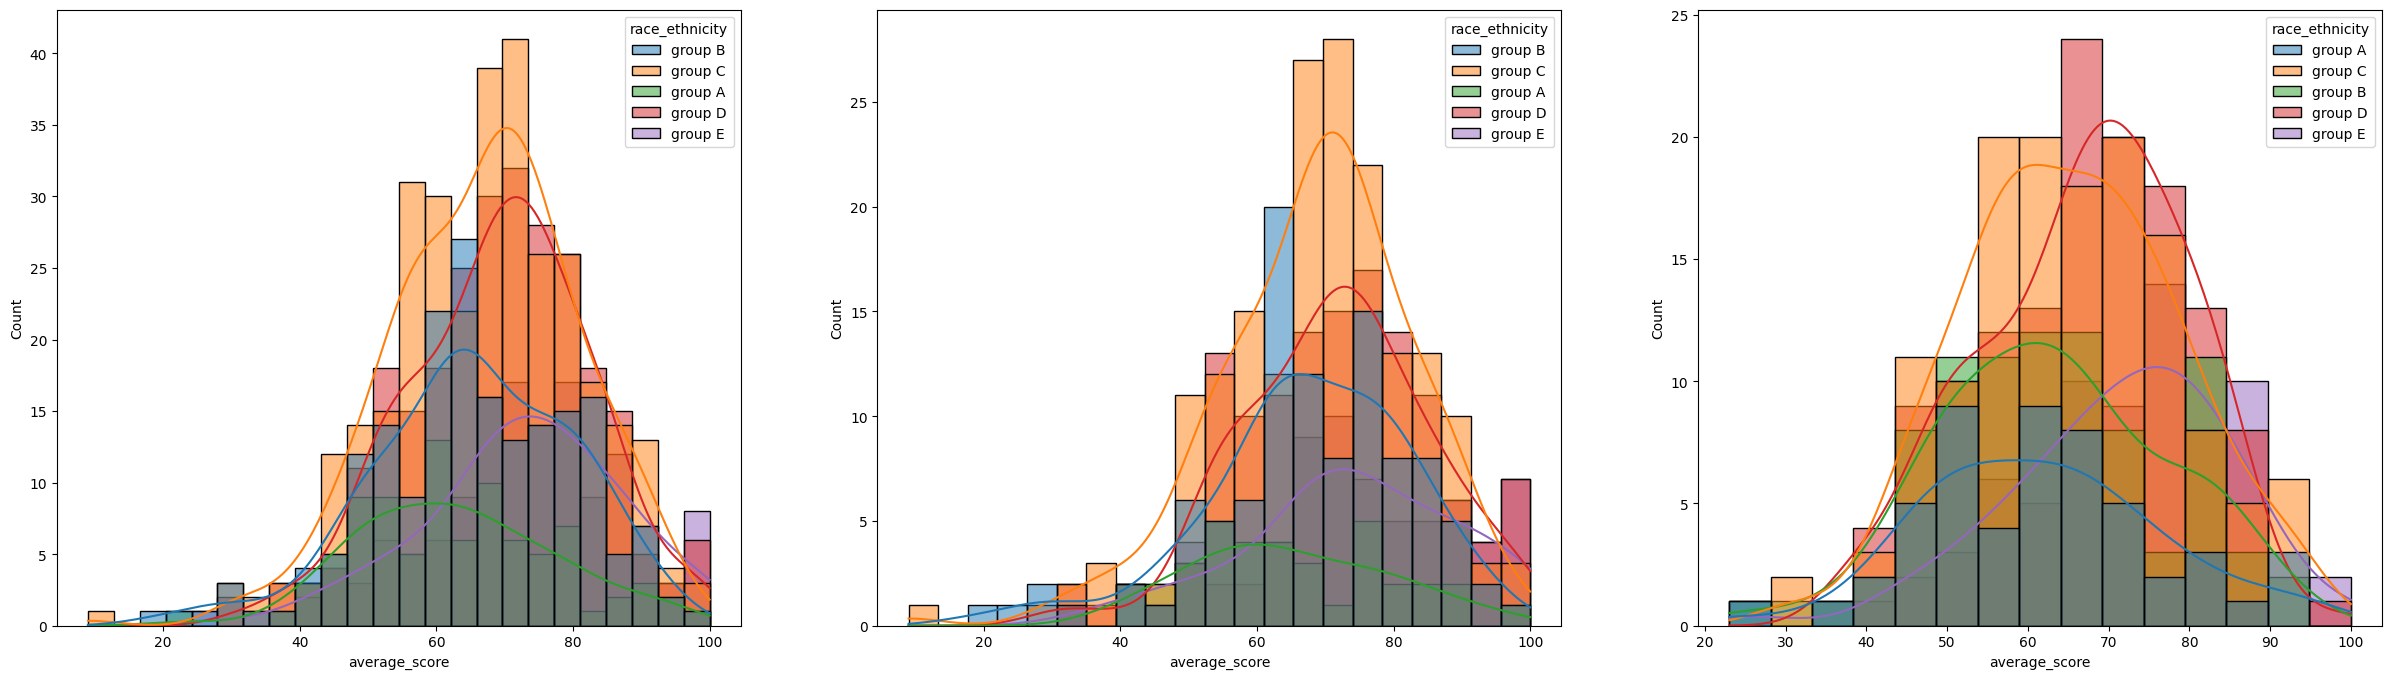

In [19]:
fig, axs = plt.subplots(1,3, figsize=(30,8))
# plt.subplots(1,3, figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df, x='average_score', kde=True, hue='race_ethnicity')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'], x='average_score', kde=True, hue='race_ethnicity')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'], x='average_score', kde=True, hue='race_ethnicity')
plt.show()

Insight
- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female. 

### 4.2 Maximumum score of students in all three subjects

<Axes: title={'center': 'WRITING SCORES'}, ylabel='writing_score'>

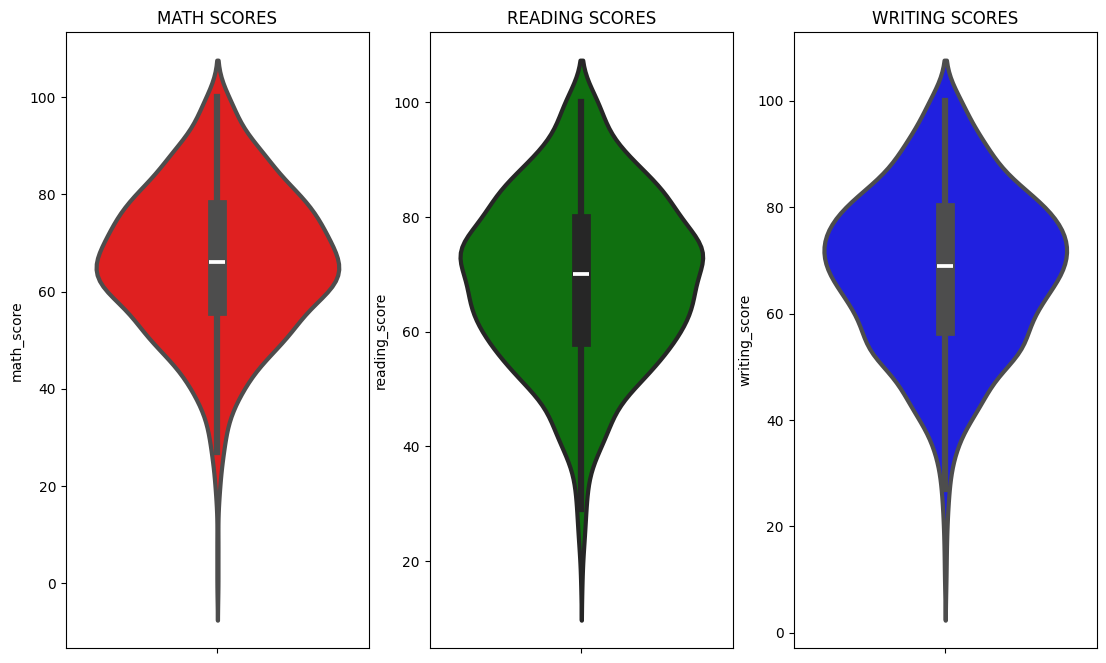

In [20]:
plt.figure(figsize=(18,8))
plt.subplot(141)
plt.title('MATH SCORES')
sns.violinplot(y='math_score', data=df, color='r', linewidth=3)
plt.subplot(142)
plt.title('READING SCORES')
sns.violinplot(y='reading_score', data=df, color='g', linewidth=3)
plt.subplot(143)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score', data=df, color='b', linewidth=3)

insights
- From the above three plots its clearly visible that most of students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

### 4.3 Multivariable analysis using pieplot

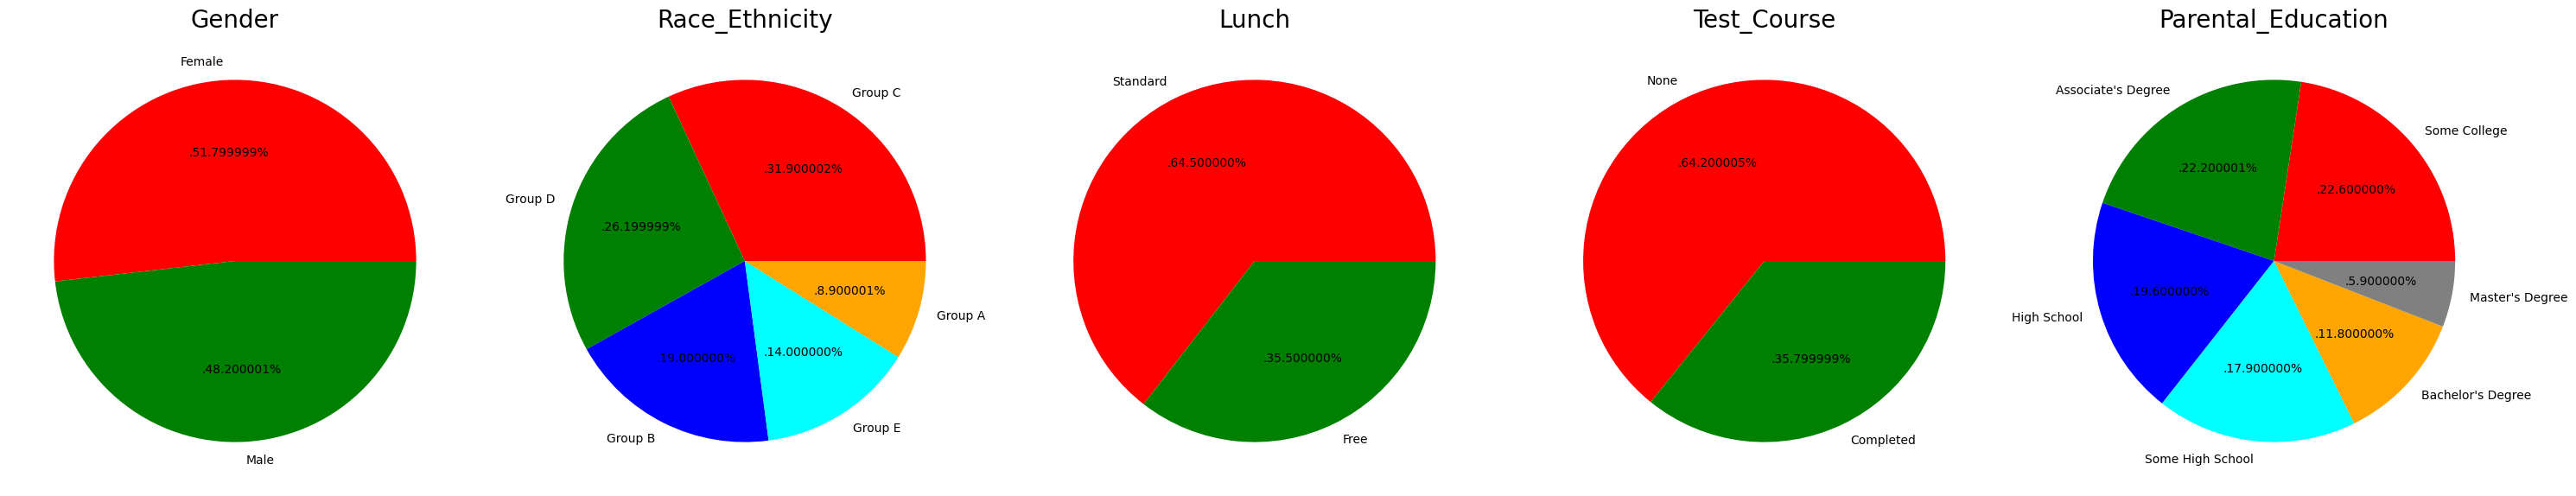

In [21]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']

plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race_Ethnicity', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test_Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental_Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

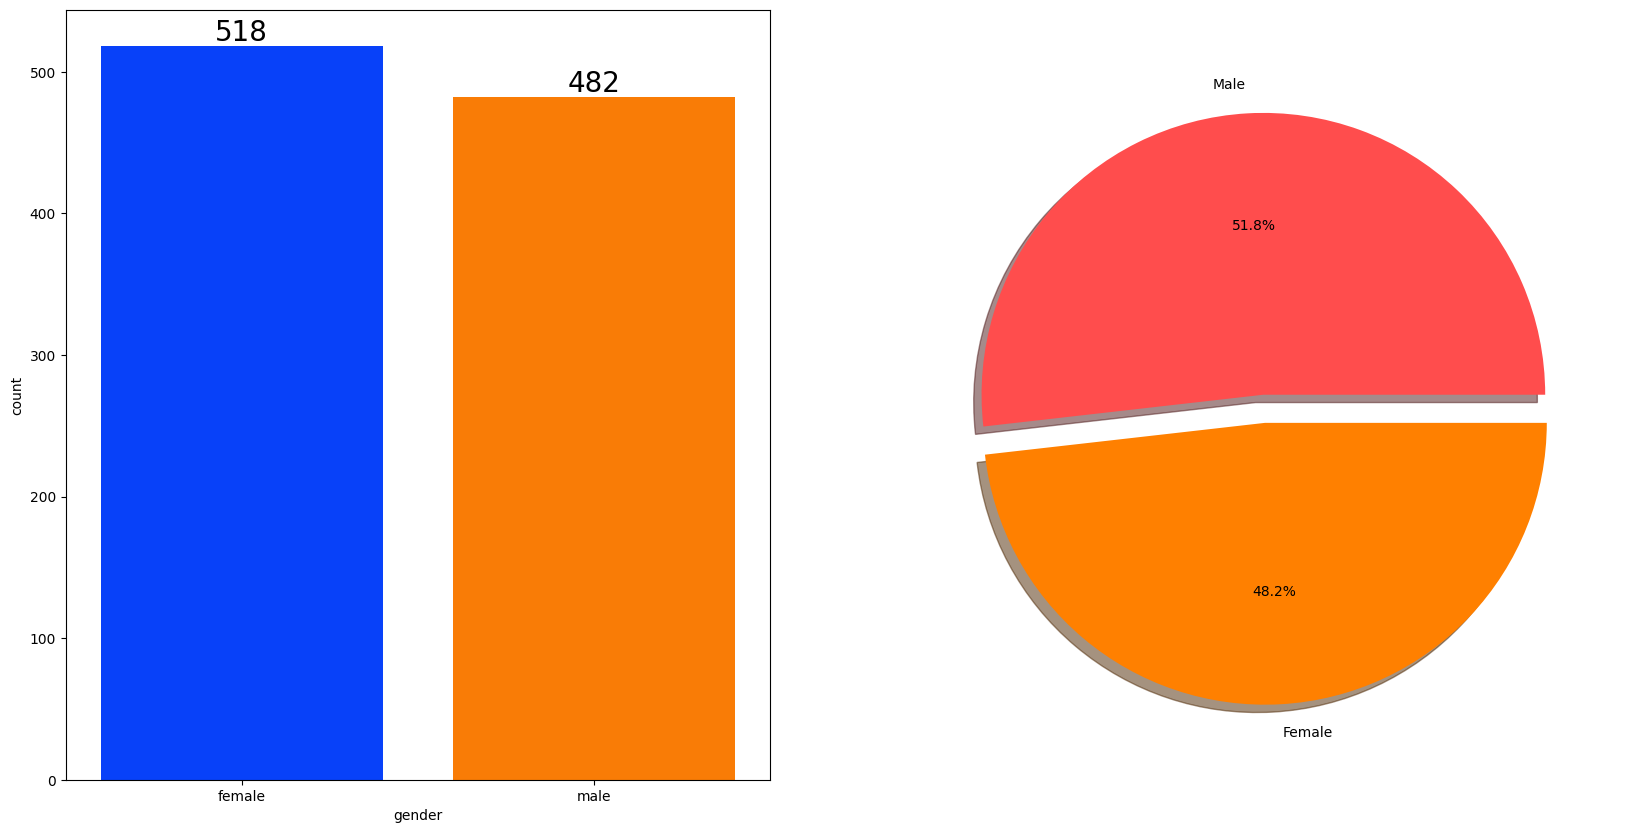

In [22]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

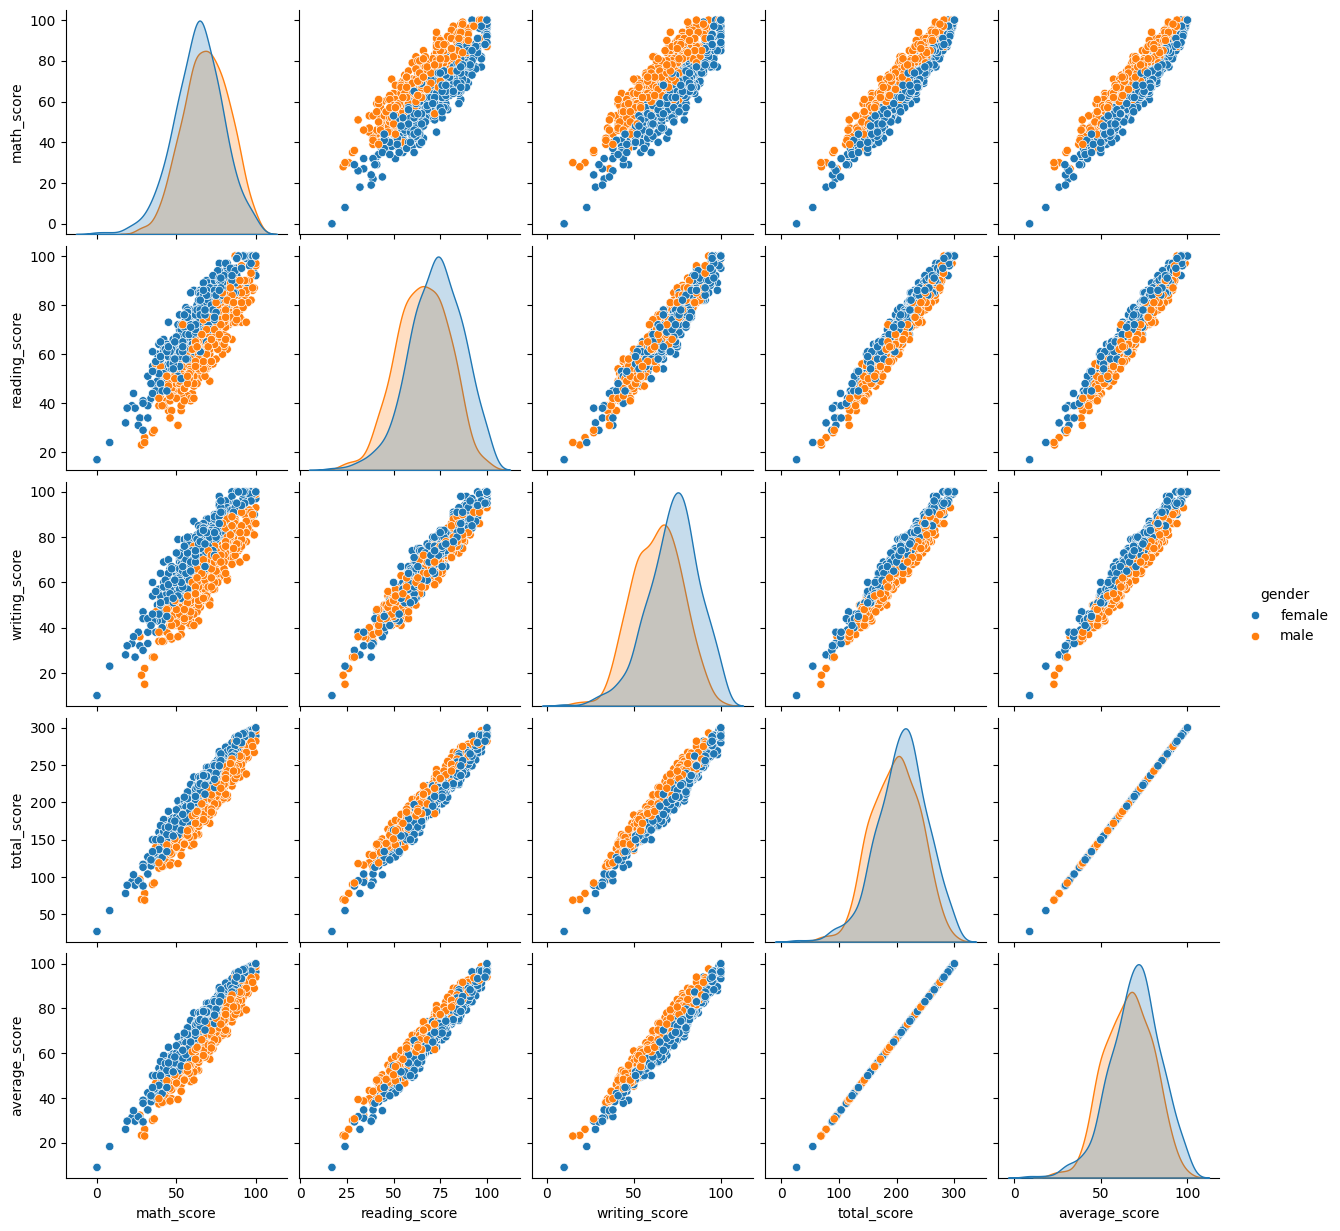

In [23]:
sns.pairplot(df,hue = 'gender')
plt.show()

## 5. Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.